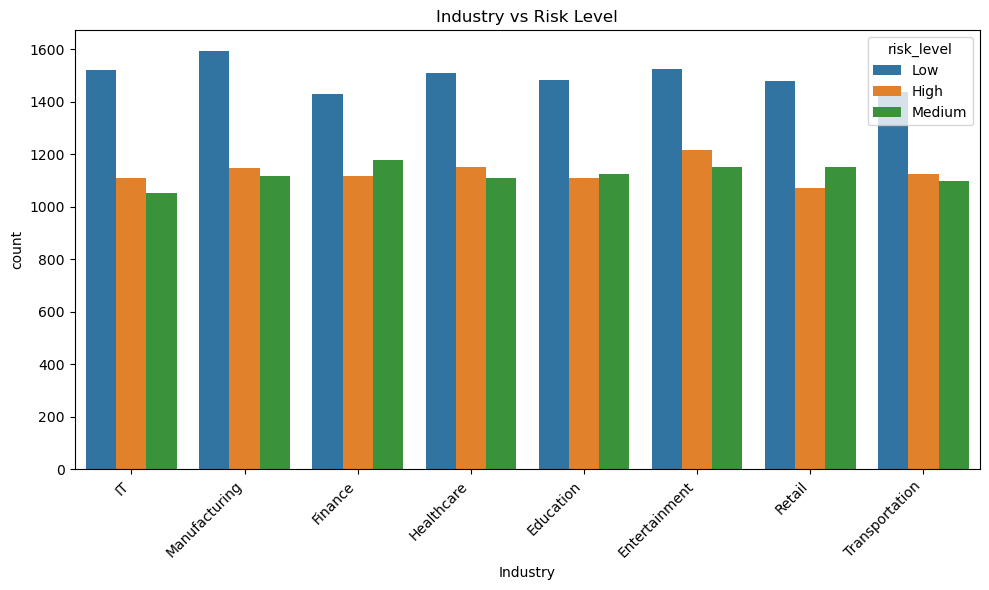

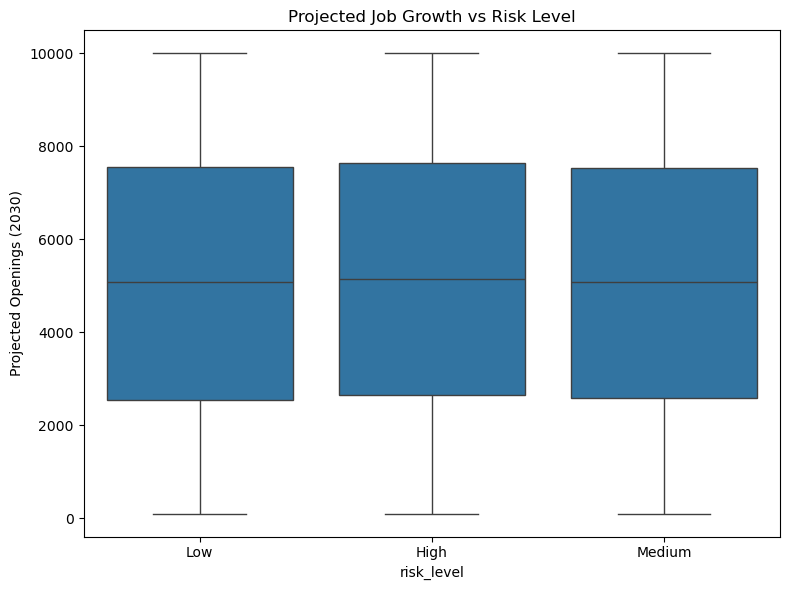


Logistic Regression Results
              precision    recall  f1-score   support

        High       0.00      0.00      0.00      1809
         Low       0.40      1.00      0.57      2395
      Medium       0.00      0.00      0.00      1796

    accuracy                           0.40      6000
   macro avg       0.13      0.33      0.19      6000
weighted avg       0.16      0.40      0.23      6000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


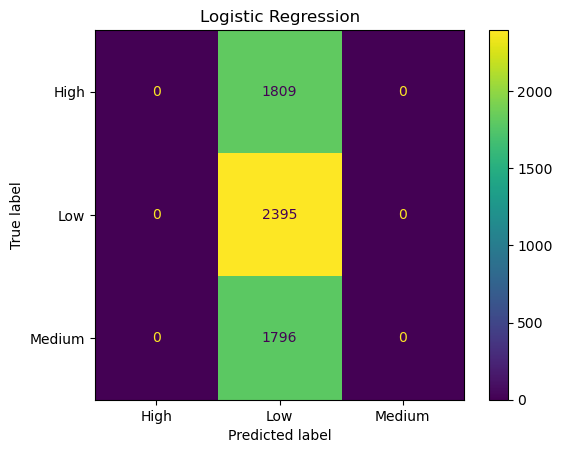


Random Forest Results
              precision    recall  f1-score   support

        High       0.31      0.27      0.29      1809
         Low       0.41      0.48      0.44      2395
      Medium       0.30      0.27      0.28      1796

    accuracy                           0.36      6000
   macro avg       0.34      0.34      0.34      6000
weighted avg       0.35      0.36      0.35      6000



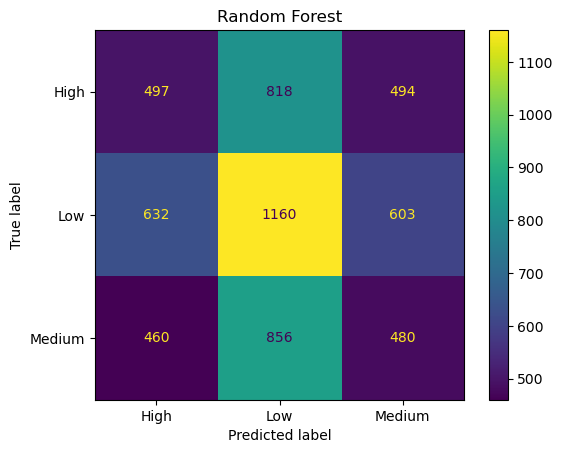

In [11]:
# Project 2 - AI Job Risk Classification

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# 1. Load data
df = pd.read_csv("ai_job_trends_dataset.csv")

# 2. Create target (High/Medium/Low risk) from Automation Risk (%)
def risk_cat(x):
    if x >= 70:
        return "High"
    elif x >= 40:
        return "Medium"
    else:
        return "Low"

df["risk_level"] = df["Automation Risk (%)"].apply(risk_cat)

# 3. Select features + clean
df = df.dropna(subset=["Industry", "Required Education", 
                       "Median Salary (USD)", "Projected Openings (2030)"])

X = df[["Industry", "Required Education", 
        "Median Salary (USD)", "Projected Openings (2030)"]].copy()
y = df["risk_level"]

# Encode categorical features
le_industry = LabelEncoder()
le_edu = LabelEncoder()
X.loc[:, "Industry"] = le_industry.fit_transform(X["Industry"])
X.loc[:, "Required Education"] = le_edu.fit_transform(X["Required Education"])

# Ensure numeric features are float before scaling
X[["Median Salary (USD)", "Projected Openings (2030)"]] = \
    X[["Median Salary (USD)", "Projected Openings (2030)"]].astype(float)

# Scale numeric features
scaler = StandardScaler()
X.loc[:, ["Median Salary (USD)", "Projected Openings (2030)"]] = scaler.fit_transform(
    X[["Median Salary (USD)", "Projected Openings (2030)"]]
)

# ---- Data Understanding Visualizations ----
# Bar chart: Industry vs Risk Level
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Industry", hue="risk_level")
plt.xticks(rotation=45, ha="right")
plt.title("Industry vs Risk Level")
plt.tight_layout()
plt.show()

# Boxplot: Projected Openings (2030) vs Risk Level
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="risk_level", y="Projected Openings (2030)")
plt.title("Projected Job Growth vs Risk Level")
plt.tight_layout()
plt.show()

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- Models ----
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Results")
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(name)
    plt.show()


In [10]:
print(df.columns.tolist())



['Job Title', 'Industry', 'Job Status', 'AI Impact Level', 'Median Salary (USD)', 'Required Education', 'Experience Required (Years)', 'Job Openings (2024)', 'Projected Openings (2030)', 'Remote Work Ratio (%)', 'Automation Risk (%)', 'Location', 'Gender Diversity (%)', 'risk_level']
